# Preparing

In [1]:
import holoviews as hv
import torch
import numpy as np
import dgl
import torch
import torch
import torch.nn as nn
import numpy as np
import sys
import panel as pn
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

pn.extension('katex')
hv.extension('bokeh')

sys.path.append('../..')
from models.sage import SAGE, get_embeddings
from datasets import Nba
from util import preprocess_nba, train
sys.path.remove('../..')

nba = Nba()
g, adj, features, sens, sens_names, masks, labels, feat_names = preprocess_nba(nba)

# create SAGE model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
in_size = features.shape[1]
out_size = int(sum(labels.unique() != -1))
model = SAGE(in_size, 16, out_size).to(device)

# Training GraphSAGE

In [2]:
train(g, features, labels, masks, model, save_path='demo_nba_sage.pth')

Epochs:   1%|          | 13/2000 [00:01<02:51, 11.57it/s]

Epoch 00000 | Loss 1.0753 | Val Accuracy 0.4883 | Val F1 0.4608


Epochs:   6%|▌         | 112/2000 [00:02<00:19, 94.52it/s]

Epoch 00100 | Loss 0.6478 | Val Accuracy 0.7136 | Val F1 0.7045


Epochs:  11%|█         | 222/2000 [00:03<00:16, 105.93it/s]

Epoch 00200 | Loss 0.5453 | Val Accuracy 0.7089 | Val F1 0.7012


Epochs:  16%|█▌        | 322/2000 [00:04<00:15, 105.13it/s]

Epoch 00300 | Loss 0.6151 | Val Accuracy 0.7324 | Val F1 0.7323


Epochs:  21%|██        | 421/2000 [00:05<00:14, 106.18it/s]

Epoch 00400 | Loss 0.5846 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  26%|██▌       | 520/2000 [00:06<00:13, 105.84it/s]

Epoch 00500 | Loss 0.5785 | Val Accuracy 0.7183 | Val F1 0.7152


Epochs:  31%|███       | 619/2000 [00:07<00:13, 105.99it/s]

Epoch 00600 | Loss 0.5383 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  36%|███▌      | 718/2000 [00:08<00:11, 107.10it/s]

Epoch 00700 | Loss 0.5549 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  41%|████      | 817/2000 [00:09<00:10, 107.71it/s]

Epoch 00800 | Loss 0.5771 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  46%|████▌     | 916/2000 [00:10<00:10, 107.59it/s]

Epoch 00900 | Loss 0.5671 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  51%|█████     | 1015/2000 [00:10<00:09, 107.79it/s]

Epoch 01000 | Loss 0.5616 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  56%|█████▌    | 1114/2000 [00:11<00:08, 107.65it/s]

Epoch 01100 | Loss 0.5735 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  61%|██████    | 1213/2000 [00:12<00:07, 107.24it/s]

Epoch 01200 | Loss 0.6247 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  66%|██████▌   | 1312/2000 [00:13<00:06, 106.98it/s]

Epoch 01300 | Loss 0.5502 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  71%|███████   | 1422/2000 [00:14<00:05, 106.99it/s]

Epoch 01400 | Loss 0.5488 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  76%|███████▌  | 1521/2000 [00:15<00:04, 107.27it/s]

Epoch 01500 | Loss 0.5560 | Val Accuracy 0.7230 | Val F1 0.7208


Epochs:  81%|████████  | 1616/2000 [00:16<00:03, 97.59it/s] 

Epoch 01600 | Loss 0.5856 | Val Accuracy 0.7230 | Val F1 0.7208
Early stopping triggered.


In [2]:
# load the model
model.load_state_dict(torch.load('demo_nba_sage.pth'))
model.eval()

SAGE(
  (layers): ModuleList(
    (0): SAGEConv(
      (feat_drop): Dropout(p=0.0, inplace=False)
      (fc_neigh): Linear(in_features=94, out_features=16, bias=False)
    )
    (1): SAGEConv(
      (feat_drop): Dropout(p=0.0, inplace=False)
      (fc_neigh): Linear(in_features=16, out_features=16, bias=False)
    )
  )
  (mlp): Linear(in_features=16, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

# Fairness Analysis

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
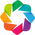

GridSpec(height=900, ncols=4, nrows=3, sizing_mode='fixed', width=1430)
    [0] Tabs(height=300, width=357)
        [0] Card(height=250, hide_header=True, name='Control Panel', sizing_mode='fixed', width=337)
            [0] Column(scroll=True)
                [0] Markdown(str)
                [1] Markdown(str)
                [2] Row
                    [0] MultiChoice(name='Sensitive Attribute', options=['Country', 'Age'], value=['Country'], width=212)
                    [1] Button(name='Confirm')
                [3] Markdown(str)
                [4] Select(name='Hop', options=[1, 2], value=2, width=200)
                [5] Markdown(str)
                [6] LaTeX(str)
                [7] Row
                    [0] Button(name='Confirm')
                    [1] Button(name='Clear')
                [8] Markdown(str)
                [9] MultiChoice(name='Nodes', options=['Oversea', 'US'], value=['Oversea', 'US'], width=212)
                [10] Select(name='Attributes', options=['All', 'None'], value='All', width=200)
                [11] Row
                    [0] Str(str)
                    [1] Switch(name='Edges', value=True)
                    [2] Str(str)
                [12] Button(name='Record')
                [13] Markdown(str)
                [14] RadioButtonGroup(options=['Original', 'Log'], value='Original')
                [15] Divider()
                [16] Markdown(str)
                [17] Markdown(str)
                [18] Select(name='Projection', options=['UMAP', 'PCA', 't-SNE'], value='UMAP', width=200)
                [19] Row
                    [0] IntSlider(end=403, name='Node Sample Size', value=300, width=200)
                    [1] Button(name='Sample')
                [20] FloatSlider(end=19.001724428219912, name='Rangeset Threshold', start=0.010546858332175968, step=0.01, value=1.8991177569887736, width=200)
                [21] Markdown(str)
                [22] Markdown(str)
                [23] Row
                    [0] FloatSlider(name='Min Density Threshold', step=0.01, value=0.2, width=200)
                    [1] Button(name='Update')
    [1] Tabs(height=600, width=357)
        [0] Card(height=550, hide_header=True, name='Fairness Metric View', sizing_mode='fixed', width=342)
            [0] Column
                [0] Markdown(str)
                [1] HoloViews(DynamicMap, height=192, sizing_mode='fixed', width=318)
            [1] HTML(str)
            [2] Column
                [0] Markdown(str)
                [1] HoloViews(None)
    [2] Tabs(height=300, width=1072)
        [0] Card(height=250, hide_header=True, name='Node Selection View', sizing_mode='fixed', width=1057)
            [0] Row
                [0] Column
                    [0] Markdown(str)
                    [1] Row
                        [0] HoloViews(DynamicMap, height=180, sizing_mode='fixed', width=68)
                        [1] HoloViews(DynamicMap, height=180, sizing_mode='fixed', width=243)
                [1] HTML(str)
                [2] Column
                    [0] Markdown(str)
                    [1] HoloViews(DynamicMap, height=182, sizing_mode='fixed', width=307)
                [3] HTML(str)
                [4] Column
                    [0] Markdown(str)
                    [1] Select(name='Clicked Subgraphs', options=[None], width=308)
                    [2] HoloViews(DynamicMap, height=127, sizing_mode='fixed', width=307)
    [3] Tabs(height=600, width=1072)
        [0] Card(height=550, hide_header=True, name='Diagnostic View', sizing_mode='fixed', width=1057)
            [0] Row
                [0] Column
                    [0] Markdown(str)
                    [1] LaTeX(str)
                    [2] LaTeX(str)
                    [3] LaTeX(str)
                    [4] LaTeX(str)
                [1] HTML(str)
                [2] Column
                    [0] Row
                        [0] Markdown(str)
                        [1] Row
                            [0] LaTeX(str, styles={'marg

In [3]:
sys.path.append('../../..')
from gnnfairviz import eug
sys.path.remove('../../..')

e = eug.EUG(model, adj, features, sens, sens_names, masks, labels, get_embeddings, feat_names=feat_names)
app = e.show()
app.servable()

# Fairness-oriented Data Augmentation

In [4]:
records = e.get_records()

In [5]:
records

[{'Sens': ['Country', 'Age'],
  'Nodes': array([  7,  15,  18,  52,  69,  80,  81, 100, 124, 170, 173, 188, 192,
         226, 281, 289, 308, 329, 331, 342, 349, 363, 367, 374, 383, 389]),
  'Edges': True,
  'Attributes': []},
 {'Sens': ['Country', 'Age'],
  'Nodes': array([  6,   7,   8,  13,  15,  17,  18,  24,  28,  38,  39,  41,  48,
          51,  57,  63,  66,  68,  71,  73,  80,  81,  82,  83,  84,  85,
          86,  87,  88,  95,  98, 100, 105, 106, 107, 109, 110, 112, 113,
         117, 120, 123, 124, 125, 129, 132, 138, 140, 142, 143, 145, 147,
         152, 153, 158, 159, 161, 163, 166, 167, 170, 171, 172, 173, 174,
         175, 177, 184, 189, 191, 193, 195, 198, 201, 207, 208, 209, 224,
         226, 228, 232, 235, 242, 245, 246, 249, 251, 253, 255, 257, 267,
         268, 270, 272, 275, 278, 281, 282, 283, 284, 286, 287, 288, 289,
         291, 292, 295, 296, 303, 304, 305, 308, 309, 311, 312, 317, 319,
         320, 321, 322, 323, 326, 328, 329, 335, 336, 339, 341, 342,

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feat = features
feat_clone = feat.clone().detach()
adj_clone = adj.clone().detach().to(device)

## Attribute Perturbation

In [7]:
selected_nodes = records[1]['Nodes']
attr_indices = []
for attr in records[1]['Attributes']:
    attr_indices.append(feat_names.index(attr))
feat_mean = feat.mean(dim=tuple(range(feat.dim() - 1)))
row_indices = torch.tensor(selected_nodes)  
col_indices = torch.tensor(attr_indices) 
# Convert row and column indices to a meshgrid of indices
rows, cols = torch.meshgrid(row_indices, col_indices, indexing='ij')
# Use fancy indexing to set the specified elements to 1
feat_clone[rows, cols] = feat_mean[attr_indices] 

## Structure Perturbation

In [8]:
selected_nodes = records[0]['Nodes']
# Converting the rows_to_zero into a tensor
selected_nodes_tensor = torch.from_numpy(selected_nodes.astype(int)).to(device)

# Get the row indices and column indices separately from the adj tensor
indices = adj_clone.coalesce().indices()
row_indices = indices[0]
col_indices = indices[1]

# Mask to zero out the selected rows
row_mask = ~torch.isin(row_indices, selected_nodes_tensor)
col_mask = ~torch.isin(col_indices, selected_nodes_tensor)
mask = row_mask & col_mask

# Apply mask
new_row_indices = row_indices[mask]
new_col_indices = col_indices[mask]
# new_values = adj_clone.values()[mask]

# Determine which diagonal indices need to be added
needed_diagonals = selected_nodes_tensor
existing_diagonals = (new_row_indices == new_col_indices) & torch.isin(new_row_indices, needed_diagonals)
missing_diagonals = needed_diagonals[~torch.isin(needed_diagonals, new_row_indices[existing_diagonals])]

# Add missing diagonal elements
if missing_diagonals.numel() > 0:
    new_row_indices = torch.cat([new_row_indices, missing_diagonals])
    new_col_indices = torch.cat([new_col_indices, missing_diagonals])
    # new_values = torch.cat([new_values, torch.ones_like(missing_diagonals, dtype=torch.float32)])

g_new = dgl.heterograph({('node', 'edge', 'node'): (new_row_indices.cpu().numpy(), new_col_indices.cpu().numpy())}) 
g_new = g_new.int().to(feat.device)

## Retraining GraphSAGE on New Data

In [9]:
nba = Nba()
g, adj, features, sens, sens_names, masks, labels, feat_names = preprocess_nba(nba)

model_new = SAGE(in_size, 16, out_size).to(device)

In [19]:
train(g_new, feat_clone, labels, masks, model_new, save_path='demo_nba_sage_retrain.pth')

Epochs:   0%|          | 0/2000 [00:00<?, ?it/s]Epochs:   1%|          | 24/2000 [00:00<00:16, 119.54it/s]

Epoch 00000 | Loss 0.7636 | Val Accuracy 0.4789 | Val F1 0.3101


Epochs:   6%|▌         | 114/2000 [00:00<00:16, 113.09it/s]

Epoch 00100 | Loss 0.6114 | Val Accuracy 0.6761 | Val F1 0.6646


Epochs:  11%|█         | 216/2000 [00:01<00:16, 107.55it/s]

Epoch 00200 | Loss 0.6371 | Val Accuracy 0.6854 | Val F1 0.6743


Epochs:  16%|█▌        | 315/2000 [00:02<00:15, 107.89it/s]

Epoch 00300 | Loss 0.6276 | Val Accuracy 0.6948 | Val F1 0.6924


Epochs:  21%|██        | 414/2000 [00:03<00:14, 107.60it/s]

Epoch 00400 | Loss 0.5993 | Val Accuracy 0.6901 | Val F1 0.6888


Epochs:  26%|██▌       | 513/2000 [00:04<00:13, 107.96it/s]

Epoch 00500 | Loss 0.5913 | Val Accuracy 0.6761 | Val F1 0.6756


Epochs:  31%|███       | 612/2000 [00:05<00:12, 108.15it/s]

Epoch 00600 | Loss 0.5895 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  36%|███▌      | 722/2000 [00:06<00:12, 105.74it/s]

Epoch 00700 | Loss 0.5703 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  41%|████      | 821/2000 [00:07<00:11, 106.28it/s]

Epoch 00800 | Loss 0.6163 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  46%|████▌     | 921/2000 [00:08<00:10, 106.23it/s]

Epoch 00900 | Loss 0.6154 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  51%|█████     | 1020/2000 [00:09<00:09, 106.09it/s]

Epoch 01000 | Loss 0.5835 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  56%|█████▌    | 1119/2000 [00:10<00:08, 106.51it/s]

Epoch 01100 | Loss 0.6169 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  61%|██████    | 1218/2000 [00:11<00:07, 104.06it/s]

Epoch 01200 | Loss 0.6039 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  66%|██████▌   | 1317/2000 [00:12<00:06, 105.48it/s]

Epoch 01300 | Loss 0.6134 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  71%|███████   | 1416/2000 [00:13<00:05, 105.10it/s]

Epoch 01400 | Loss 0.6055 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  76%|███████▌  | 1515/2000 [00:14<00:04, 104.58it/s]

Epoch 01500 | Loss 0.5981 | Val Accuracy 0.6808 | Val F1 0.6798


Epochs:  81%|████████  | 1611/2000 [00:15<00:03, 106.86it/s]

Epoch 01600 | Loss 0.6239 | Val Accuracy 0.6808 | Val F1 0.6798
Early stopping triggered.


In [10]:
# load the model
model_new.load_state_dict(torch.load('demo_nba_sage_retrain.pth'))
model_new.eval()

SAGE(
  (layers): ModuleList(
    (0): SAGEConv(
      (feat_drop): Dropout(p=0.0, inplace=False)
      (fc_neigh): Linear(in_features=94, out_features=16, bias=False)
    )
    (1): SAGEConv(
      (feat_drop): Dropout(p=0.0, inplace=False)
      (fc_neigh): Linear(in_features=16, out_features=16, bias=False)
    )
  )
  (mlp): Linear(in_features=16, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

## Comparison of original and new GraphSAGE models

In [11]:
sys.path.append('../..')
import node_classification
sys.path.remove('../..')

def concatenate_elements(*args):
    return "-".join(map(str, args))

vectorized_concat = np.vectorize(concatenate_elements)
# Apply the vectorized function across columns
sens_current = vectorized_concat(*sens)

# retrained sage
with torch.no_grad():
    logits = model_new(g, features)
predictions = torch.argmax(logits, dim=1).cpu().numpy()
labels_np = labels.cpu().numpy()
labeled_mask = labels_np != -1
labeled_predictions = predictions[labeled_mask]
labeled_labels = labels_np[labeled_mask]
labeled_sens = sens_current[labeled_mask]
sage_new_metrics = [
    node_classification.delta_std_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_sp(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_sp(labeled_predictions, labeled_labels, labeled_sens),
]
print('sage new metrics:', sage_new_metrics)

# sage
with torch.no_grad():
    logits = model(g, features)
predictions = torch.argmax(logits, dim=1).cpu().numpy()
labels_np = labels.cpu().numpy()
labeled_mask = labels_np != -1
labeled_predictions = predictions[labeled_mask]
labeled_labels = labels_np[labeled_mask]
labeled_sens = sens_current[labeled_mask]
sage_metrics = [
    node_classification.delta_std_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_sp(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_sp(labeled_predictions, labeled_labels, labeled_sens),
]
print('sage metrics:', sage_metrics)

sage new metrics: [0.18770154844545245, 0.22549019607843135, 0.13921341827181716, 0.4081696081696082, 0.2784268365436343, 0.4081696081696082, 0.36192745540595966, 0.5333333333333334]
sage metrics: [0.18903086588685716, 0.2791666666666667, 0.16461521637876259, 0.5100759144237406, 0.32923043275752517, 0.5100759144237405, 0.4312609793949243, 0.6125]


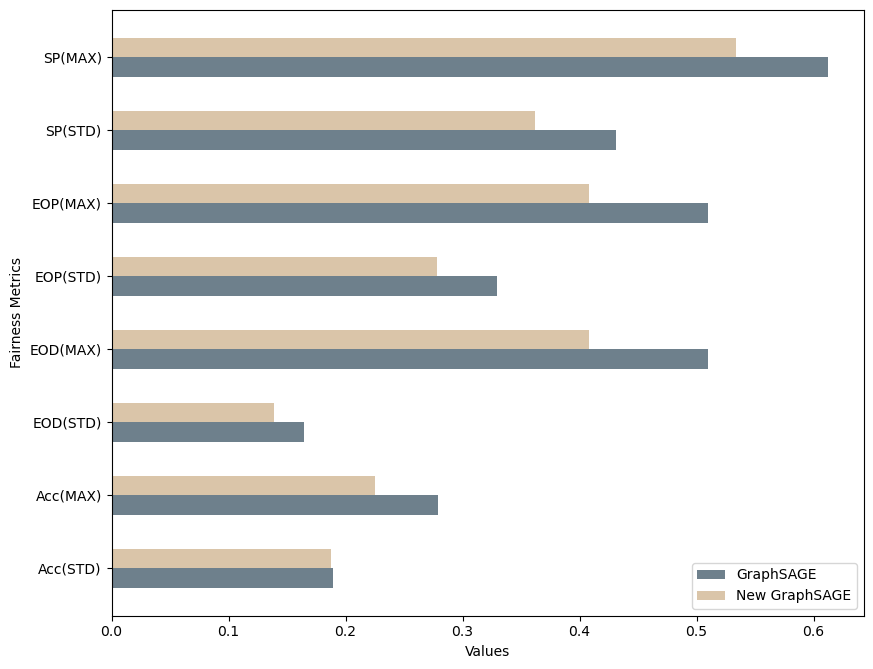

In [12]:
import matplotlib.pyplot as plt


# Labels for the metrics
labels = ['Acc(STD)', 'Acc(MAX)', 'EOD(STD)', 'EOD(MAX)', 'EOP(STD)', 'EOP(MAX)', 'SP(STD)', 'SP(MAX)']

# Creating the plot
fig, ax = plt.subplots(figsize=(8.84, 6.79))  # Adjusted figure height for more compactness
bar_width = 0.09
bar_spacing = 0.0  # Spacing between bars
index = range(len(labels))
index = list(map(lambda x: x / 3, index))  # Double the index to create space between the bars

bar1 = ax.barh(index, sage_metrics, bar_width, label='GraphSAGE', color='#6E808C')
bar2 = ax.barh([p + bar_width for p in index], sage_new_metrics, bar_width, label='New GraphSAGE', color='#DAC5A9')

# Adding labels, title, and legend
ax.set_ylabel('Fairness Metrics')
ax.set_xlabel('Values')
# ax.set_xticks([p + 1.5 * bar_width for p in index])
ax.set_yticks([p + (bar_width + bar_spacing) / 2 for p in index])
# ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.legend()

# Adjust the layout to be more compact
plt.tight_layout()

# Show the plot
plt.show()

# Training GCN

In [13]:
sys.path.append('../..')
from models.gcn import GCN
sys.path.remove('../..')

model_gcn = GCN(in_size, 16, out_size).to(device)

In [3]:
train(g, features, labels, masks, model_gcn, save_path='demo_nba_sage_gcn.pth')

Epochs:   0%|          | 10/2000 [00:01<02:59, 11.08it/s]

Epoch 00000 | Loss 0.7383 | Val Accuracy 0.5305 | Val F1 0.3777


Epochs:   6%|▌         | 117/2000 [00:02<00:23, 78.97it/s]

Epoch 00100 | Loss 0.5577 | Val Accuracy 0.6667 | Val F1 0.6668


Epochs:  11%|█         | 216/2000 [00:03<00:22, 81.09it/s]

Epoch 00200 | Loss 0.5257 | Val Accuracy 0.6901 | Val F1 0.6865


Epochs:  16%|█▌        | 315/2000 [00:04<00:20, 81.22it/s]

Epoch 00300 | Loss 0.5157 | Val Accuracy 0.6714 | Val F1 0.6651


Epochs:  21%|██        | 414/2000 [00:06<00:19, 80.95it/s]

Epoch 00400 | Loss 0.5270 | Val Accuracy 0.6901 | Val F1 0.6865


Epochs:  26%|██▌       | 512/2000 [00:07<00:18, 79.08it/s]

Epoch 00500 | Loss 0.5110 | Val Accuracy 0.6948 | Val F1 0.6921


Epochs:  30%|███       | 609/2000 [00:08<00:17, 79.48it/s]

Epoch 00600 | Loss 0.4956 | Val Accuracy 0.6901 | Val F1 0.6865


Epochs:  36%|███▌      | 712/2000 [00:09<00:16, 80.01it/s]

Epoch 00700 | Loss 0.5451 | Val Accuracy 0.6901 | Val F1 0.6865


Epochs:  40%|████      | 809/2000 [00:11<00:15, 79.09it/s]

Epoch 00800 | Loss 0.5316 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  46%|████▌     | 917/2000 [00:12<00:13, 79.25it/s]

Epoch 00900 | Loss 0.5214 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  51%|█████     | 1016/2000 [00:13<00:12, 79.49it/s]

Epoch 01000 | Loss 0.5165 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  56%|█████▌    | 1116/2000 [00:15<00:11, 79.61it/s]

Epoch 01100 | Loss 0.5174 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  61%|██████    | 1212/2000 [00:16<00:09, 79.74it/s]

Epoch 01200 | Loss 0.5216 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  65%|██████▌   | 1309/2000 [00:17<00:08, 81.32it/s]

Epoch 01300 | Loss 0.5228 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  71%|███████   | 1415/2000 [00:18<00:07, 80.20it/s]

Epoch 01400 | Loss 0.5276 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  76%|███████▌  | 1510/2000 [00:19<00:06, 79.75it/s]

Epoch 01500 | Loss 0.5240 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  81%|████████  | 1611/2000 [00:21<00:04, 78.78it/s]

Epoch 01600 | Loss 0.5184 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  86%|████████▌ | 1710/2000 [00:22<00:03, 82.15it/s]

Epoch 01700 | Loss 0.4962 | Val Accuracy 0.6901 | Val F1 0.6871


Epochs:  91%|█████████ | 1814/2000 [00:23<00:02, 76.53it/s]

Epoch 01800 | Loss 0.5517 | Val Accuracy 0.6901 | Val F1 0.6871
Early stopping triggered.


In [14]:
# load the model
model_gcn.load_state_dict(torch.load('demo_nba_sage_gcn.pth'))
model_gcn.eval()

GCN(
  (layers): ModuleList(
    (0): GraphConv(in=94, out=16, normalization=both, activation=<function relu at 0x7f88e1c67240>)
    (1): GraphConv(in=16, out=16, normalization=both, activation=None)
  )
  (mlp): Linear(in_features=16, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

## Comparison of GraphSAGE Model and GCN Model

In [15]:
sys.path.append('../..')
import node_classification
sys.path.remove('../..')

def concatenate_elements(*args):
    return "-".join(map(str, args))

vectorized_concat = np.vectorize(concatenate_elements)
# Apply the vectorized function across columns
sens_current = vectorized_concat(*sens)

# gcn
with torch.no_grad():
    logits = model_gcn(g, features)
predictions = torch.argmax(logits, dim=1).cpu().numpy()
labeled_predictions = predictions[labeled_mask]
labeled_labels = labels_np[labeled_mask]
labeled_sens = sens_current[labeled_mask]
gcn_metrics = [
    node_classification.delta_std_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_acc(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eod(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_eop(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_std_sp(labeled_predictions, labeled_labels, labeled_sens),
    node_classification.delta_max_sp(labeled_predictions, labeled_labels, labeled_sens),
]
print('gcn metrics:', gcn_metrics)

gcn metrics: [0.1786972845912046, 0.2899999999999999, 0.12333262188975354, 0.3548673548673549, 0.24666524377950708, 0.3548673548673549, 0.3330675142365067, 0.42916666666666664]


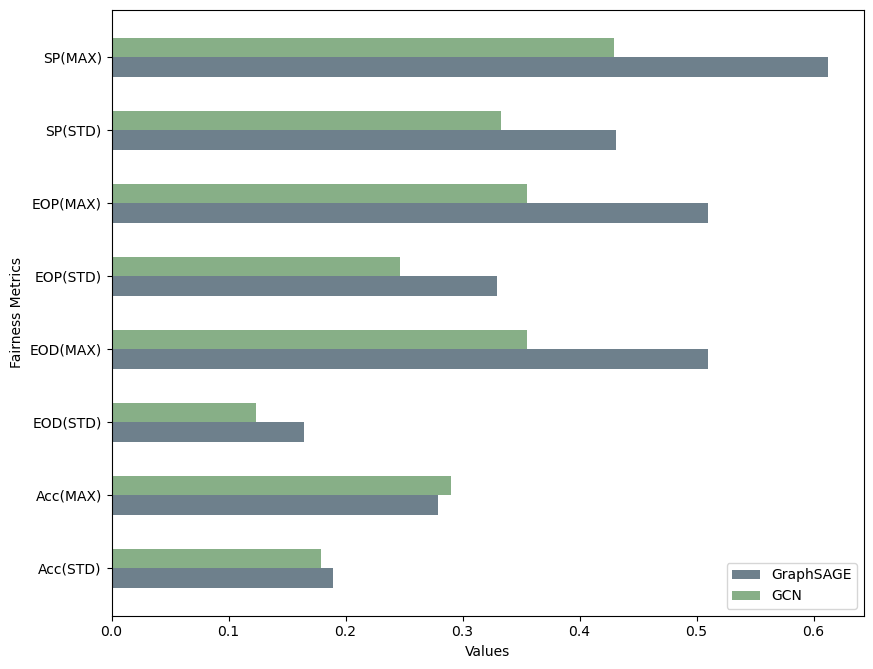

In [16]:
import matplotlib.pyplot as plt


# Labels for the metrics
labels = ['Acc(STD)', 'Acc(MAX)', 'EOD(STD)', 'EOD(MAX)', 'EOP(STD)', 'EOP(MAX)', 'SP(STD)', 'SP(MAX)']

# Creating the plot
fig, ax = plt.subplots(figsize=(8.84, 6.79))  # Adjusted figure height for more compactness
bar_width = 0.09
bar_spacing = 0.0  # Spacing between bars
index = range(len(labels))
index = list(map(lambda x: x / 3, index))  # Double the index to create space between the bars

bar1 = ax.barh(index, sage_metrics, bar_width, label='GraphSAGE', color='#6E808C')
bar3 = ax.barh([p + bar_width for p in index], gcn_metrics, bar_width, label='GCN', color='#87AF87')

# Adding labels, title, and legend
ax.set_ylabel('Fairness Metrics')
ax.set_xlabel('Values')
# ax.set_xticks([p + 1.5 * bar_width for p in index])
ax.set_yticks([p + (bar_width + bar_spacing) / 2 for p in index])
# ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.legend()

# Adjust the layout to be more compact
plt.tight_layout()

# Show the plot
plt.show()


# Comparison of 3 Models

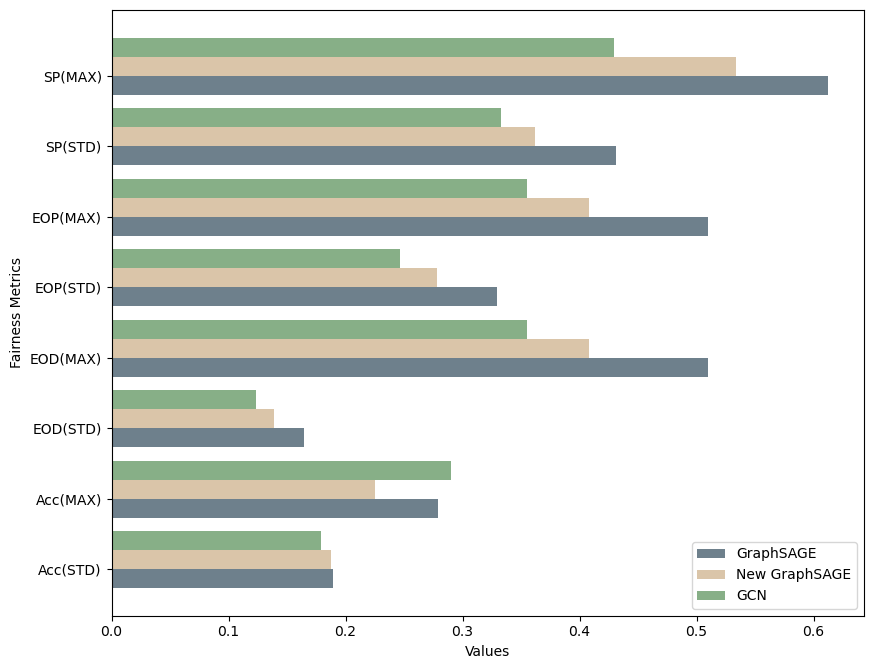

In [17]:
import matplotlib.pyplot as plt


# Labels for the metrics
labels = ['Acc(STD)', 'Acc(MAX)', 'EOD(STD)', 'EOD(MAX)', 'EOP(STD)', 'EOP(MAX)', 'SP(STD)', 'SP(MAX)']

# Creating the plot
fig, ax = plt.subplots(figsize=(8.84, 6.79))  # Adjusted figure height for more compactness
bar_width = 0.09
bar_spacing = 0.0  # Spacing between bars
index = range(len(labels))
index = list(map(lambda x: x / 3, index))  # Double the index to create space between the bars

bar1 = ax.barh(index, sage_metrics, bar_width, label='GraphSAGE', color='#6E808C')
bar2 = ax.barh([p + bar_width for p in index], sage_new_metrics, bar_width, label='New GraphSAGE', color='#DAC5A9')
bar3 = ax.barh([p + 2 * bar_width for p in index], gcn_metrics, bar_width, label='GCN', color='#87AF87')

# Adding labels, title, and legend
ax.set_ylabel('Fairness Metrics')
ax.set_xlabel('Values')
# ax.set_xticks([p + 1.5 * bar_width for p in index])
ax.set_yticks([p + (bar_width + bar_spacing) / 2 for p in index])
# ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.legend()

# Adjust the layout to be more compact
plt.tight_layout()

# Show the plot
plt.show()


# Develop a model ready for real-world deployment ...
Knowing why the model is unfair, develop a new model by taking other factors (e.g., trade-off between accuracy and fairness) into consideration for real-world deployment.